<a href="https://colab.research.google.com/github/alifele/Draft/blob/master/NeuralNetworkPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [0]:
mnist = fetch_openml('mnist_784', version=1)

In [25]:
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

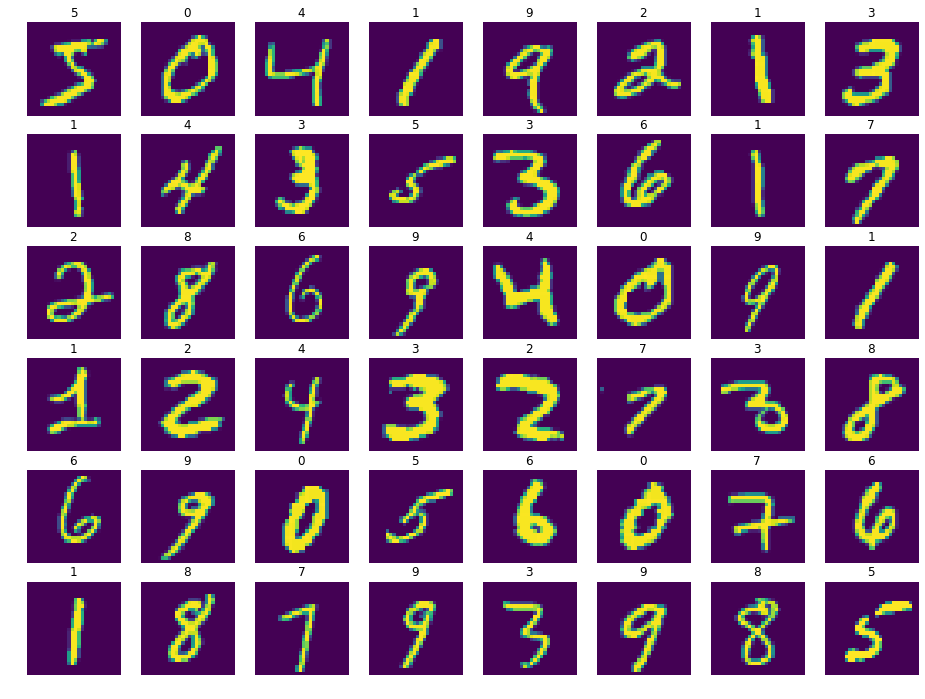

In [26]:
X = mnist.data
y = mnist.target

fig = plt.figure(figsize=(16,12))
for i in range(48):
  ax = fig.add_subplot(6,8,i+1,title=y[i])
  ax.imshow(X[i].reshape(28,28))
  ax.axis('off')

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = X.T

X = scaler.fit_transform(X)

X = X.T

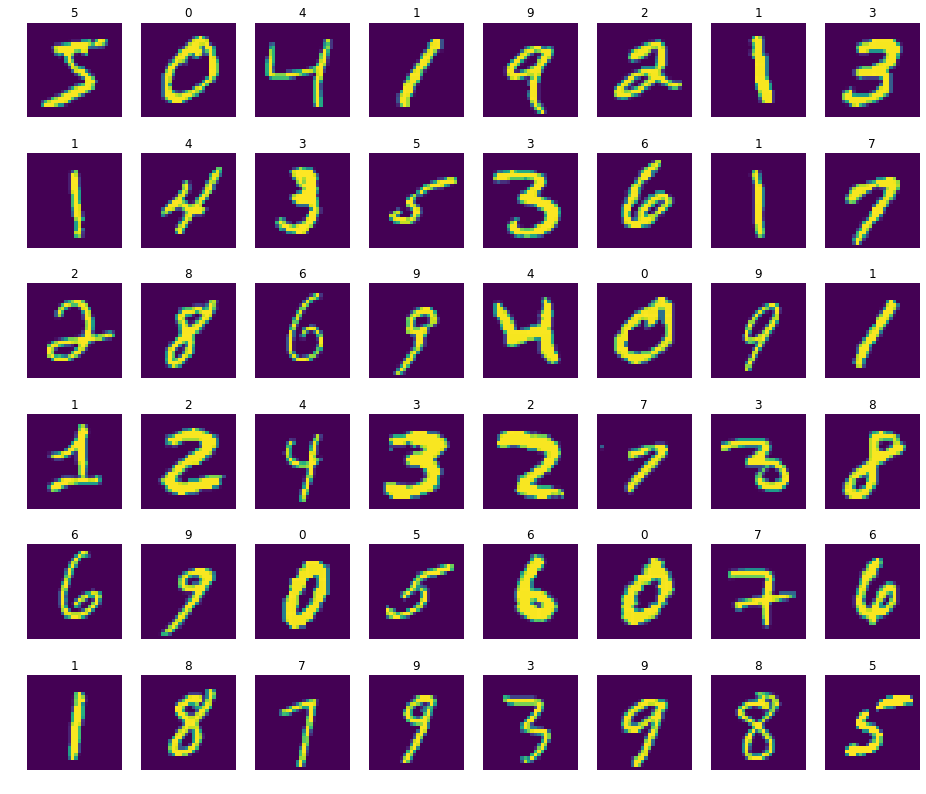

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
X_train = X_train.reshape(-1,28,28)
X_test = X_test.reshape(-1,28,28)
fig = plt.figure(figsize=(16,14))
for i in range(48):
  ax = fig.add_subplot(6,8,i+1,title=y[i])
  ax.imshow(X[i].reshape(28,28))
  ax.axis('off')
  
  

In [34]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(250, activation='relu'),
    keras.layers.Dropout(0.6),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32),
    keras.layers.Dense(10, activation='softmax'),
   
])

W0619 21:10:00.653863 140114571806592 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


In [0]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='Adam',
             metrics=['accuracy'])

In [36]:
his = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Train on 42000 samples, validate on 10500 samples
Epoch 1/5
42000/42000 [==============================] - 5s 118us/sample - loss: 0.6257 - acc: 0.8027 - val_loss: 0.2155 - val_acc: 0.9358
Epoch 2/5
42000/42000 [==============================] - 4s 104us/sample - loss: 0.3333 - acc: 0.9049 - val_loss: 0.1699 - val_acc: 0.9500
Epoch 3/5
42000/42000 [==============================] - 4s 104us/sample - loss: 0.2728 - acc: 0.9230 - val_loss: 0.1527 - val_acc: 0.9543
Epoch 4/5
42000/42000 [==============================] - 4s 104us/sample - loss: 0.2413 - acc: 0.9305 - val_loss: 0.1321 - val_acc: 0.9596
Epoch 5/5
42000/42000 [==============================] - 5s 109us/sample - loss: 0.2178 - acc: 0.9366 - val_loss: 0.1224 - val_acc: 0.9627


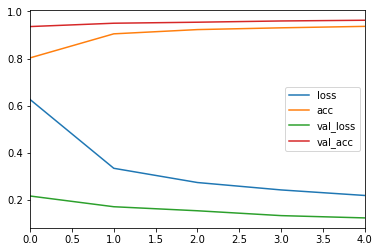

In [37]:
import pandas as pd
pd.DataFrame(his.history).plot()